# Imports

In [1]:
import tkinter as tk
from tkinter import *
from tkinter.ttk import *
from tkinter import ttk
import PIL as pil
from PIL import ImageTk, Image
from tkinter import font

import pandas as pd
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from torch import nn
import torch as torch
import torchvision.transforms.functional as TF
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import os
from tkinter import messagebox
import torchvision.models as models


## Import data

In [2]:
data_path = r'Data\train.csv'
temp_data = pd.read_csv(data_path, index_col=['Id'])

train_data = pd.DataFrame(temp_data)

X = train_data.drop(columns=['Pawpularity'])
y = train_data['Pawpularity']
random = 30997
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=random)

# Uge 10 kapitel 7

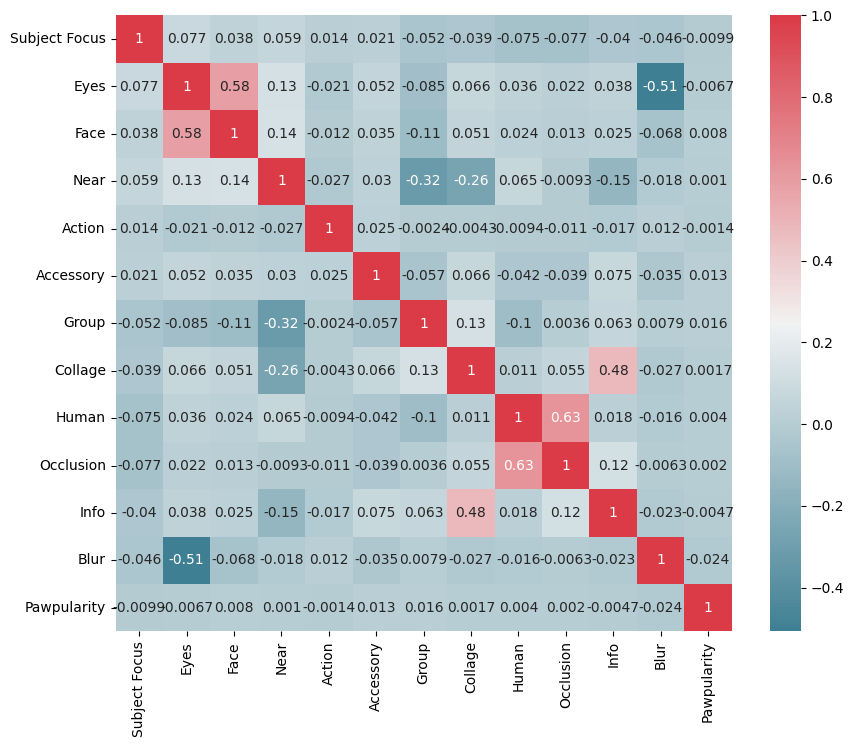

In [3]:
def correlationMatrix(data):
    f, ax = plt.subplots(figsize=(10, 8))
    corr = data.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
    plt.savefig("static/correlationmatrix.png")
correlationMatrix(train_data)


In [4]:

def linear_regression( X: pd.DataFrame, y: pd.DataFrame):
    lin_reg = LinearRegression()
    lin_reg.fit(X,y)
    return lin_reg

lin_reg = linear_regression(X_train,y_train)


In [5]:
columns =   ["Occlusion", "Near", "Subject Focus", "Group"]
logiX = train_data[columns]
logiy = train_data['Human'].values
logiX_train, logiX_test,logiy_train,logiy_test = train_test_split(logiX,logiy,test_size=0.2,random_state=random)

def logistic_regression_contains_human(X: pd.DataFrame, y:pd.DataFrame):
    log_reg = LogisticRegression()
    log_reg.fit(X,y)
    return log_reg

logi_reg = logistic_regression_contains_human(logiX_train,logiy_train)


# Uge 10 kapitel 8

## ROC Curve
*For binary classifier*

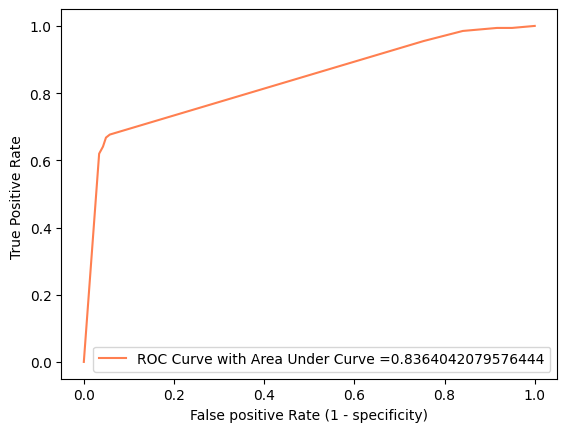

In [6]:
def get_roccurve(model, X_test_data: npt.ArrayLike, y_test_data: npt.ArrayLike, reg_type_name: str = ""):
    y_pred_proba = model.predict_proba(X=X_test_data)[:,1]
    [fpr, tpr, thr] = roc_curve(y_test_data, y_pred_proba)
    auc (fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve ='+str(auc (fpr, tpr)))
    plt.xlabel('False positive Rate (1 - specificity)')
    plt.ylabel('True Positive Rate ')
    plt.legend(loc='lower right')
    plt.savefig("./static/roccurve_" + reg_type_name + ".png")

get_roccurve(logi_reg, logiX_test, logiy_test, "logisticregression")

## Confusion matrix
*For classifiers*

In [7]:
def get_confusionmatrix(model, X_test_data: npt.ArrayLike, y_test_data: npt.ArrayLike):
    logiy_pred = model.predict(X_test_data)
    conf_matrix = sklearn.metrics.confusion_matrix(y_test_data, logiy_pred)
    return conf_matrix

get_confusionmatrix(logi_reg, logiX_test, logiy_test)

array([[1579,   70],
       [ 120,  214]], dtype=int64)

## Performance metrics
*For classifiers*

In [8]:
def get_performancemetrics(model, X_test_data: npt.ArrayLike, y_test_data: npt.ArrayLike, model_type_name: str = ""):
    y_pred = model.predict(X_test_data)
    p = sklearn.metrics.precision_score(y_test_data, y_pred, average='micro')
    r = sklearn.metrics.recall_score(y_test_data, y_pred, average='micro')
    f = sklearn.metrics.f1_score(y_test_data, y_pred, average='micro')
    a = sklearn.metrics.accuracy_score(y_test_data,y_pred)
    return "Here're the metrics for the trained model(" + model_type_name + "):\nPrecision:\t{}\nRecall:\t\t{}\nF-Score:\t\t{}\nAccuracy:\t{}".format(p,r,f,a)

get_performancemetrics(logi_reg, logiX_test, logiy_test, "logisticregression")

"Here're the metrics for the trained model(logisticregression):\nPrecision:\t0.9041855774079677\nRecall:\t\t0.9041855774079677\nF-Score:\t\t0.9041855774079677\nAccuracy:\t0.9041855774079677"

## Cross validation for linear regression

In [9]:
def do_crossvalidation():
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)

    score_history = []
    for train, test in kf.split(X, y):
        reg = LinearRegression()
        reg.fit(X.values[train,:], y.iloc[train])
        y_pred = reg.predict(X.values[test,:])
        score_history.append(reg.score(X.values[test,:], y.iloc[test]))
    return '\n'.join(map(str, score_history))
do_crossvalidation()

'-0.0011381531784111498\n-0.0032655098200438104\n0.0031372020899773645\n-0.0007086870944514878\n-0.0024666721129855684'

## Uge 11 kapitel 9

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [11]:
GNB = GaussianNB()
MNB = MultinomialNB()
bayesX = train_data.drop(columns=['Occlusion', 'Pawpularity'])
bayesy = train_data['Occlusion']
bayesX_train, bayesX_test,bayesy_train,bayesy_test = train_test_split(bayesX,bayesy,test_size=0.2,random_state=random)
GNB.fit(bayesX_train, bayesy_train)
MNB.fit(bayesX_train, bayesy_train)

Gbayesy_pred = GNB.predict(bayesX_test)
Gcm = confusion_matrix(bayesy_test, Gbayesy_pred)
print(Gcm)

Mbayesy_pred = MNB.predict(bayesX_test)
Mcm = confusion_matrix(bayesy_test, Mbayesy_pred)
print(Mcm)


[[  78 1584]
 [   3  318]]
[[1564   98]
 [ 111  210]]


## Uge 12 kapitel 10

### Bagging

In [12]:
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.tree import export_graphviz
import pydotplus

In [13]:
RandomforrestX_train, RandomforrestX_test,Randomforresty_train,Randomforresty_test = train_test_split(bayesX,bayesy,test_size=0.2,random_state=random)

RFModel = RandomForestClassifier(n_estimators=10, max_samples=0.7)
RFModel.fit(RandomforrestX_train,Randomforresty_train)

RFpred = RFModel.predict(RandomforrestX_test)
confusion_matrix(RFpred,Randomforresty_test)


array([[1557,   94],
       [ 105,  227]], dtype=int64)

### Boosting

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [15]:
base = DecisionTreeClassifier(criterion='gini', max_depth=1)
model_ada = AdaBoostClassifier(estimator = base, n_estimators=10)
model_ada.fit(bayesX_train, bayesy_train)
model_ada.feature_importances_

c:\Users\blabl\Desktop\PAW\PetfinderPawpularityScore\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([0.1, 0. , 0. , 0.2, 0. , 0.1, 0.2, 0.1, 0.2, 0.1, 0. ])

### Stacking

In [16]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

In [17]:
SkackingModels =[('Logistic Regression',LogisticRegression()),("Mulit Bayes",MultinomialNB()), ('Naive Bayes',GaussianNB())]

stacking_model = StackingClassifier(estimators=SkackingModels,  final_estimator=LogisticRegression(), cv=3)

stacking_model.fit(bayesX_train, bayesy_train)

stacky_pred = stacking_model.predict(bayesX_test)
accuracy_score(bayesy_test, stacky_pred)

0.8976298537569339

## Uge 15 kapitel 11

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import matplotlib.pyplot as plt

import cv2
from sklearn.preprocessing import MinMaxScaler


In [19]:
kmean_columns = ['Pawpularity']
kmean_data = train_data.drop(columns=kmean_columns)
# kmean_train, kmean_test = train_test_split(train_data, test_size=0.75, random_state=random)
scaler = MinMaxScaler()
kmean_data_scaled = pd.DataFrame(scaler.fit_transform(kmean_data))
# kmean_test_scaled = pd.DataFrame(scaler.fit_transform(kmean_test))

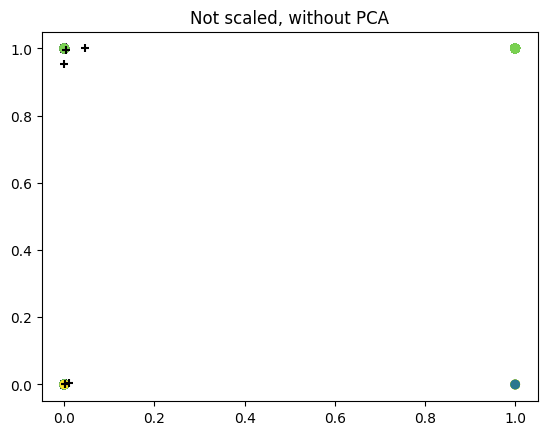

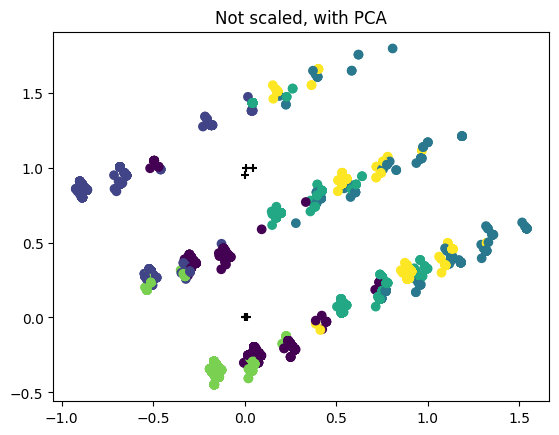

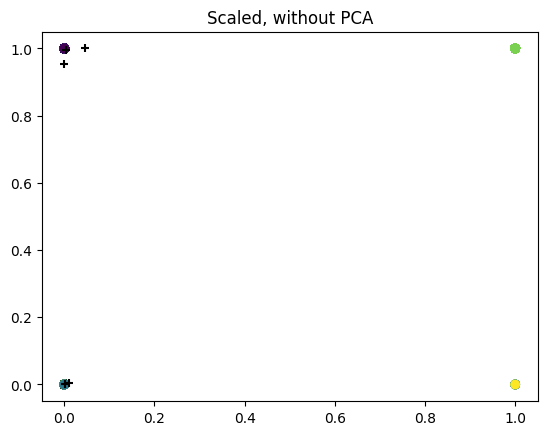

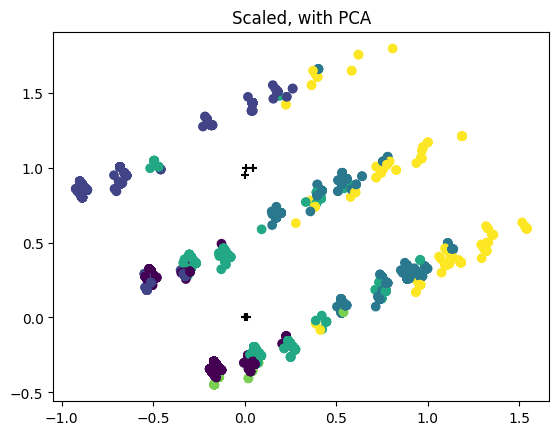

In [20]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(kmean_data)
kmean_pred = kmeans.predict(kmean_data)

kmeans_with_scaled = KMeans(n_clusters=6)
kmeans_with_scaled.fit(kmean_data_scaled)
kmean_pred_from_scaled = kmeans_with_scaled.predict(kmean_data_scaled)

pca = PCA(n_components=2)

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()

ax1.scatter(kmean_data.to_numpy()[:,0], kmean_data.to_numpy()[:,1], c=kmean_pred)
ax1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')
ax1.set_title("Not scaled, without PCA")
fig1.savefig("./static/kmeansplot_noscale_nopca.png")

X_pca = pca.fit_transform(kmean_data)
ax2.scatter(X_pca[:,0], X_pca[:,1], c=kmean_pred)
ax2.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')
ax2.set_title("Not scaled, with PCA")
fig2.savefig("./static/kmeansplot2_noscale_pca.png")

ax3.scatter(kmean_data_scaled.to_numpy()[:,0], kmean_data_scaled.to_numpy()[:,1], c=kmean_pred_from_scaled)
ax3.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')
ax3.set_title("Scaled, without PCA")
fig3.savefig("./static/kmeansplot3_scale_nopca.png")

X_pca = pca.fit_transform(kmean_data_scaled)
ax4.scatter(X_pca[:,0], X_pca[:,1], c=kmean_pred_from_scaled)
ax4.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')
ax4.set_title("Scaled, with PCA")
fig4.savefig("./static/kmeansplot4_scale_pca.png")



Visualize + knee point

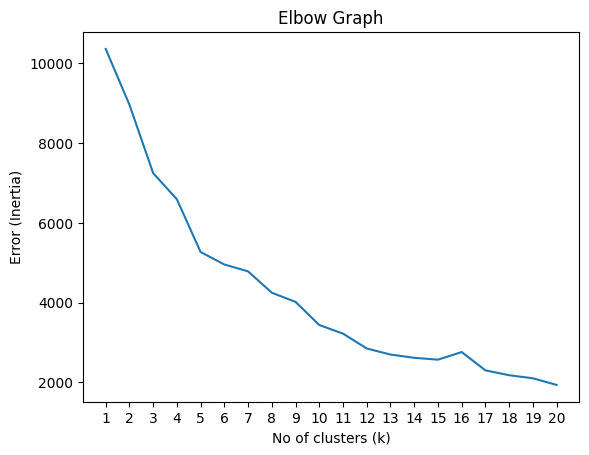

In [21]:
error = []
for i in range(1,21):
 kmeans = KMeans(n_clusters=i).fit(kmean_data_scaled)
 error.append(kmeans.inertia_)

plt.plot(range(1,21), error)
plt.title("Elbow Graph")
plt.xlabel("No of clusters (k)")
plt.ylabel("Error (Inertia)")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.savefig("static/kmeans_elbowgraph.png")

### Clustering for images

<Figure size 1000x1000 with 0 Axes>

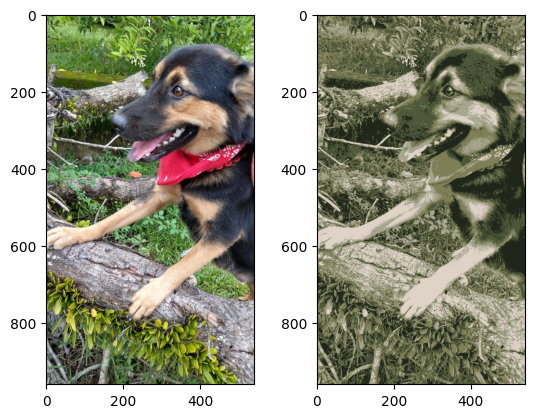

<Figure size 1000x1000 with 0 Axes>

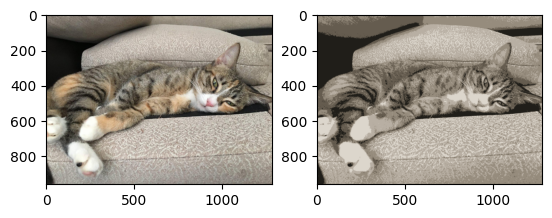

In [22]:
def image_kmeans(path: str, clusters: int = 5):
    source_image = cv2.imread(path)
    image = cv2.cvtColor(source_image, cv2.COLOR_RGB2BGR)
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    K=clusters
    _, labels, (centers) = cv2.kmeans(pixel_values, K, None, criteria, 10,
    cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    labels = labels.flatten()

    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    plt.figure(figsize=(10,10))
    fig, axs = plt.subplots(1,2)

    axs[0].imshow(image)
    axs[1].imshow(segmented_image)
    plt.show()

image_kmeans(r"Data\train\0a51fa22c7b84249889d1e157c54c11f.jpg")
image_kmeans(r"Data\train\0adbd3eeacf2e8318dc0313a5738543f.jpg")

## Uge 16+17 kapitel 12+13

In [23]:
#Husk også at importere dataen oppe fra Uge 10\n
    
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

In [24]:
# Laver Dataframen om til numpy arrays og specificerer dem som datatypen "np.float32"
logiX_train_as_array = np.array(logiX_train, dtype=np.float32)
logiX_test_as_array = np.array(logiX_test, dtype=np.float32)
logiy_train_as_array = np.array(logiy_train, dtype=np.float32)
logiy_test_as_array = np.array(logiy_test, dtype=np.float32)

In [25]:
# Laver de konverterede numpy arrays om til Pytorch Tensors via torch.tensor
X_train_tensor = torch.tensor(logiX_train_as_array)
y_train_tensor = torch.tensor(logiy_train_as_array)
X_test_tensor = torch.tensor(logiX_test_as_array)
y_test_tensor = torch.tensor(logiy_test_as_array)

In [26]:
# Definerer det neutrale netværks model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(X_train_tensor.shape[1], 32)
        self.hidden2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.sigmoid(self.output(x))
        return x

In [27]:
# Træner det neutrale netværk
def train_model(model, X_train, y_train, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred.squeeze(), y_train)
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')
    return model

model = NeuralNetwork()
criterion = nn.MSELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Stochastic Gradient Descent

trained_nn_model = train_model(model, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch 1/50, Loss: 0.2737
Epoch 2/50, Loss: 0.2736
Epoch 3/50, Loss: 0.2736
Epoch 4/50, Loss: 0.2735
Epoch 5/50, Loss: 0.2735
Epoch 6/50, Loss: 0.2734
Epoch 7/50, Loss: 0.2734
Epoch 8/50, Loss: 0.2733
Epoch 9/50, Loss: 0.2733
Epoch 10/50, Loss: 0.2732
Epoch 11/50, Loss: 0.2732
Epoch 12/50, Loss: 0.2732
Epoch 13/50, Loss: 0.2731
Epoch 14/50, Loss: 0.2731
Epoch 15/50, Loss: 0.2730
Epoch 16/50, Loss: 0.2730
Epoch 17/50, Loss: 0.2729
Epoch 18/50, Loss: 0.2729
Epoch 19/50, Loss: 0.2728
Epoch 20/50, Loss: 0.2728
Epoch 21/50, Loss: 0.2727
Epoch 22/50, Loss: 0.2727
Epoch 23/50, Loss: 0.2726
Epoch 24/50, Loss: 0.2726
Epoch 25/50, Loss: 0.2726
Epoch 26/50, Loss: 0.2725
Epoch 27/50, Loss: 0.2725
Epoch 28/50, Loss: 0.2724
Epoch 29/50, Loss: 0.2724
Epoch 30/50, Loss: 0.2723
Epoch 31/50, Loss: 0.2723
Epoch 32/50, Loss: 0.2722
Epoch 33/50, Loss: 0.2722
Epoch 34/50, Loss: 0.2721
Epoch 35/50, Loss: 0.2721
Epoch 36/50, Loss: 0.2720
Epoch 37/50, Loss: 0.2720
Epoch 38/50, Loss: 0.2720
Epoch 39/50, Loss: 0.

In [28]:
# Evaluer modellen
def evaluate_nn_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        predicted = (y_pred > 0.5).float()
        accuracy = (predicted == y_test).float().mean().item()
        print(f'Test Accuracy: {accuracy:.2f}')
    return accuracy

nn_test_accuracy = evaluate_nn_model(trained_nn_model, X_test_tensor, y_test_tensor)

Test Accuracy: 0.17


## Uge 18 kapitel 14

Data prep

In [29]:

class ImageDatasetFromCSV(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        self.labels_df = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.labels_df.iloc[idx, 0])
        image = Image.open(img_name)
        label = self.labels_df.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        
        return image, label

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

csv_file = r"Data/cat_or_dog_train.csv"  # Replace with your CSV file path
image_dir = r"Data/cat_or_dog_train"  # Replace with your image directory

full_dataset = ImageDatasetFromCSV(csv_file, image_dir, transform=transform)

# Define the train-test split ratio
train_ratio = 0.8
test_ratio = 0.2
total_size = len(full_dataset)
train_size = int(total_size * train_ratio)
test_size = total_size - train_size

convolutional_train_data, convolutional_test_data = random_split(full_dataset, [train_size, test_size])

# Create DataLoader for train and test datasets
batch_size = 32
convolutional_train_loader = DataLoader(convolutional_train_data, batch_size=batch_size, shuffle=True)
convolutional_test_loader = DataLoader(convolutional_test_data, batch_size=batch_size, shuffle=False)



Convolutional neural network model

In [30]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.convlayer = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4)
        )
        self.fully_connected_layer_1 = nn.Linear(in_features=32*7*7, out_features=64)
        self.drop = nn.Dropout(0.25)
        self.fully_connected_layer_2 = nn.Linear(in_features=64, out_features=64)
        self.fully_connected_layer_3 = nn.Linear(in_features=64, out_features=10)
    
    def forward(self, x):
        out = self.convlayer(x)
        out = out.view(out.size(0), -1)
        out = self.fully_connected_layer_1(out)
        out = self.drop(out)
        out = self.fully_connected_layer_2(out)
        out = self.fully_connected_layer_3(out)
        return out

CNN_model = CNN()

error = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNN_model.parameters(), lr=0.005)
lstlosses = []
lstiterations = []
lstaccuracy = []

predictions_list = []
labels_list = []

num_epochs = 3 
num_batches = 0 
batch_size = 16 

for epoch in range(num_epochs):
    print("Epoch: {} of {}".format(epoch + 1, num_epochs))
    for images, labels in convolutional_train_loader:
        train = Variable(images)
        labels = Variable(labels)

        outputs = CNN_model(train)
        loss = error(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        num_batches += 1

        if num_batches % batch_size == 0:
            total = 0
            matches = 0
            
            for images, labels in convolutional_test_loader:
                labels_list.append(labels)
                test = Variable(images)
                outputs = CNN_model(test)

                predictions = torch.max(outputs, 1)[1]
                predictions_list.append(predictions)
                matches += (predictions == labels).sum()
                total += len(labels)

            accuracy = matches * 100 / total
            lstlosses.append(loss.data)
            lstiterations.append(num_batches)
            lstaccuracy.append(accuracy)

        if not (num_batches % batch_size):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(num_batches, loss.data, accuracy))


print("Training completed.")



Epoch: 1 of 3
Iteration: 16, Loss: 0.8312647938728333, Accuracy: 50.0%
Iteration: 32, Loss: 0.6885508894920349, Accuracy: 50.125%
Iteration: 48, Loss: 0.6775642037391663, Accuracy: 50.125%
Iteration: 64, Loss: 0.6609006524085999, Accuracy: 53.75%
Iteration: 80, Loss: 0.6963109374046326, Accuracy: 57.875%
Iteration: 96, Loss: 0.6557121872901917, Accuracy: 58.875%
Iteration: 112, Loss: 0.6473006010055542, Accuracy: 56.625%
Iteration: 128, Loss: 0.6739694476127625, Accuracy: 61.625%
Iteration: 144, Loss: 0.644503116607666, Accuracy: 63.5%
Iteration: 160, Loss: 0.6601864695549011, Accuracy: 58.75%
Iteration: 176, Loss: 0.6163245439529419, Accuracy: 62.5625%
Iteration: 192, Loss: 0.6187691688537598, Accuracy: 59.5%
Epoch: 2 of 3
Iteration: 208, Loss: 0.6886438131332397, Accuracy: 56.1875%
Iteration: 224, Loss: 0.5838664770126343, Accuracy: 61.625%
Iteration: 240, Loss: 0.6203151345252991, Accuracy: 58.0625%
Iteration: 256, Loss: 0.6929939985275269, Accuracy: 62.5625%
Iteration: 272, Loss: 0

Applikation

In [31]:
def load_image(image_path):
    image = Image.open(image_path)
    return transform(image).unsqueeze(0)  # Add batch dimension

def predict_cat_or_dog_image(CNN_model, image_tensor):
    CNN_model.eval()
    with torch.no_grad(): 
        outputs = CNN_model(image_tensor)
        _, predicted = torch.max(outputs, 1)
    return predicted

def display_prediction(image_name, predicted_label):
    class_names = ['Cat', 'Dog']  
    prediction_text = f"Predicted label: {predicted_label.item()} ({class_names[predicted_label]})"

    return prediction_text

def on_predict():
    image_name = entry.get()
    if not image_name:
        messagebox.showwarning("Input Error", "Please enter an image name.")
        return

    try:
        image_name_path = "Data/train/" + image_name + ".jpg"

        image_tensor = load_image(image_name_path)

        predicted_label = predict_cat_or_dog_image(CNN_model, image_tensor)

        prediction = display_prediction(image_name_path, predicted_label)

        result_label.config(text=prediction)

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

window = tk.Tk()
window.title("Image Prediction Application")
window.geometry("600x400")

tk.Label(window, text="Enter image name:").pack(pady=10)
entry = tk.Entry(window, width=50)
entry.pack(pady=10)

predict_button = tk.Button(window, text="Predict", command=on_predict)
predict_button.pack(pady=10)

result_label = tk.Label(window, text="", fg="blue")
result_label.pack(pady=20)

window.mainloop()

Uge 15 del 2

Data prep

In [32]:
csv_file = r"Data/train.csv"
image_dir = r"Data/train"

df = pd.read_csv(csv_file, nrows=100)

label_columns = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']

labels_df = df[['Id'] + label_columns]


Classes og funktioner

In [33]:
class ImageDatasetFromCSV(Dataset):
    def __init__(self, labels_df, image_dir, transform=None, file_extension='.jpg'):
        self.labels_df = labels_df
        self.image_dir = image_dir
        self.transform = transform
        self.file_extension = file_extension


    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.labels_df.iloc[idx, 0] + self.file_extension)
        image = Image.open(img_name)
        labels = torch.tensor(self.labels_df.iloc[idx, 1:].values.astype('float32'))

        if self.transform:
            image = self.transform(image)

        return image, labels

class MultiLabelCNN(nn.Module):
    def __init__(self, num_classes):
        super(MultiLabelCNN, self).__init__()
        self.multi_model = models.resnet18(pretrained=True)
        self.multi_model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.multi_model.fc = nn.Linear(self.multi_model.fc.in_features, num_classes)

    def forward(self, x):
        return self.multi_model(x)

num_classes = len(label_columns)
multi_model = MultiLabelCNN(num_classes)

full_dataset = ImageDatasetFromCSV(labels_df, image_dir, transform=transform)

c:\Users\blabl\Desktop\PAW\PetfinderPawpularityScore\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\blabl\Desktop\PAW\PetfinderPawpularityScore\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training

In [34]:
criterion = nn.BCEWithLogitsLoss()  # Suitable for multi-label classification
optimizer = torch.optim.Adam(multi_model.parameters(), lr=0.001)

batch_size = 16
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

lstlosses = []
lstiterations = []
lstaccuracy = []

num_epochs = 2 
num_batches = 0 
print_interval = 5

def train_model(multi_model, train_loader, criterion, optimizer, num_epochs, num_batches):
    for epoch in range(num_epochs):
        print(f"Epoch: {epoch + 1} of {num_epochs}")  
        for images, labels in train_loader:
            images = Variable(images)
            labels = Variable(labels)

            outputs = multi_model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            num_batches += 1

            if num_batches % print_interval == 0:
                total = 0
                correct = 0
                
                with torch.no_grad():
                    for images, labels in test_loader:
                        images = Variable(images)
                        labels = Variable(labels)
                        outputs = multi_model(images)
                        predicted = (outputs > 0.5).float()
                        correct += (predicted == labels).sum().item()
                        total += labels.numel() 

                accuracy = 100 * correct / total
                lstlosses.append(loss.item())
                lstiterations.append(num_batches)
                lstaccuracy.append(accuracy)

                print(f"Iteration: {num_batches}, Loss: {loss.item()}, Accuracy: {accuracy}%")

def evaluate_model(multi_model, test_loader):
    multi_model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = Variable(images)
            labels = Variable(labels)
            outputs = multi_model(images)
            predicted = (outputs > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.numel() 

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy}%')

train_model(multi_model, train_loader, criterion, optimizer, num_epochs, num_batches)

evaluate_model(multi_model, test_loader)

Epoch: 1 of 2
Iteration: 5, Loss: 0.47771522402763367, Accuracy: 87.08333333333333%
Epoch: 2 of 2
Iteration: 10, Loss: 0.33935222029685974, Accuracy: 87.5%
Test Accuracy: 79.58333333333333%


In [35]:
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)  # Add batch dimension

def predict_all_labels_image(multi_model, image_tensor):
    multi_model.eval() 
    with torch.no_grad(): 
        outputs = multi_model(image_tensor)
        predictions = torch.sigmoid(outputs).squeeze().numpy()
        predicted_labels = [label_columns[i] for i in range(len(label_columns)) if predictions[i] > 0.5]
        print(predicted_labels)
    return predicted_labels

def display_prediction(predicted_labels):
    if not predicted_labels:
        return "No labels detected"
    else:
        return "Predicted labels: " + ", ".join(predicted_labels)

def on_predict():
    image_name = entry.get()
    if not image_name:
        messagebox.showwarning("Input Error", "Please enter an image name.")
        return

    try:
        image_name_path = os.path.join(r"Data/train", image_name + ".jpg")
        if not os.path.exists(image_name_path):
            raise FileNotFoundError(f"Image '{image_name}.jpg' not found in 'Data/train'")

        image_tensor = load_image(image_name_path)

        predicted_labels = predict_all_labels_image(multi_model, image_tensor)

        prediction = display_prediction(predicted_labels)

        result_label.config(text=prediction)

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

window = tk.Tk()
window.title("Image Prediction Application")
window.geometry("600x400")

tk.Label(window, text="Enter image name:").pack(pady=10)
entry = tk.Entry(window, width=50)
entry.pack(pady=10)

predict_button = tk.Button(window, text="Predict", command=on_predict)
predict_button.pack(pady=10)

result_label = tk.Label(window, text="", fg="blue")
result_label.pack(pady=20)

window.mainloop()

In [36]:
class ModelHolder():
    lin_reg = lin_reg
    log_reg_for_human = logi_reg
    nn_model = trained_nn_model
    cnn_model = CNN_model
    all_label_model = multi_model

# TTK

In [41]:
class Application(tk.Tk):
    current_image_path = 'Not set yet'
    def __init__(self):
        super().__init__()

        self.window_width = "700"
        self.window_height = "700"
        self.geometry(self.window_width+"x"+self.window_height)

        self.checkbutton_frame = tk.Frame(self)
        self.checkbutton_frame.pack(padx=10, pady=10)

        self.labels = ["Subject Focus", "Eyes", "Face", "Near", "Action", "Accessory", "Group", "Collage", "Human", "Occlusion", "Info", "Blur"]
        self.check_vars = {}
        self.num_columns = 6
        for i, label in enumerate(self.labels):
            var = tk.BooleanVar()
            self.check_vars[label] = var

            checkbutton = tk.Checkbutton(self.checkbutton_frame, text=label, variable=var)

            row = i // self.num_columns
            column = i % self.num_columns

            checkbutton.grid(row=row, column=column, sticky="w", padx=5, pady=5)

        self.button_frame = tk.Frame(self)
        self.button_frame.pack(padx=10, pady=10)

        self.search_button = tk.Button(self.button_frame, text='Find billede', command=self.searchImage)
        self.search_button.pack()

        self.result_frame = tk.Frame(self, height=400)
        self.result_frame.pack(padx=10, pady=10, fill=tk.BOTH, expand=True)

        self.score_Text = Label(self.result_frame)
        self.score_Text.pack()

        self.image_frame = tk.Frame(self.result_frame, width=350)
        self.image_frame.pack(padx=10, pady=10, side=tk.LEFT, fill=tk.BOTH, expand=True)

        self.image_label = Label(self.image_frame)
        self.image_label.pack()

        self.metrics_frame = tk.Frame(self.result_frame)
        self.metrics_frame.pack(padx=10, pady=10, fill=tk.BOTH, expand=True)

        self.header_font = font.Font(weight="bold", size=14)
        self.metrics_header_label = Label(self.metrics_frame, text="Metrics", font=self.header_font)
        self.metrics_header_label.pack()
        self.performance_measure_label = Label(self.metrics_frame, text="Performance measure")
        self.performance_measure_label.pack(anchor="w")
        self.cross_validation_label = Label(self.metrics_frame, text="Cross validation")
        self.cross_validation_label.pack(anchor="w")
        self.nn_evaluation_label = Label(self.metrics_frame, text="NN evaluation")
        self.nn_evaluation_label.pack(anchor="w")
        self.roc_curve_button = tk.Button(self.metrics_frame, text="Vis Roc Curve", command=self.show_roccurve)
        self.roc_curve_button.pack()

        self.image_properties_label = Label(self.result_frame)
        self.image_properties_label.pack()

        self.cat_or_dog_label = Label(self.result_frame)
        self.cat_or_dog_label.pack()

        self.options_frame = tk.Frame(self)
        self.options_frame.pack(padx=10, pady=10)

        self.pawpularity_options_frame = tk.Frame(self.options_frame)
        self.pawpularity_options_frame.pack(padx=10, pady=10, side=tk.LEFT, fill=tk.BOTH, expand=True)
        self.pawpularity_options_header = Label(self.pawpularity_options_frame, text="Vælg model til at forudsige score", wraplength=200, font=self.header_font)
        self.pawpularity_options_header.pack()
        self.choose_lin_reg_button = tk.Button(self.pawpularity_options_frame, text="Vælg lineær regression", command=self.use_lin_reg_for_pawpularity)
        self.choose_lin_reg_button.pack()
        
        self.human_options_frame = tk.Frame(self.options_frame)
        self.human_options_frame.pack(padx=10, pady=10, side=tk.LEFT, fill=tk.BOTH, expand=True)
        self.human_options_header = Label(self.human_options_frame, text="Vælg model til at forudsige om der er menneske på billedet", wraplength=200, font=self.header_font)
        self.human_options_header.pack()

        self.choose_log_reg_for_human_button = tk.Button(self.human_options_frame, text="Vælg logistisk regression", command=self.use_log_reg_for_human)
        self.choose_log_reg_for_human_button.pack()
        self.choose_nn_for_human_button = tk.Button(self.human_options_frame, text="Vælg Neural network", command=self.use_nn_for_human)
        self.choose_nn_for_human_button.pack()
        self.choose_ens_methods_for_human_button = tk.Button(self.human_options_frame, text="Vælg ensemble metoder", command=self.use_ens_methods_for_human)
        self.choose_ens_methods_for_human_button.pack()

        self.occlusion_options_frame = tk.Frame(self.options_frame)
        self.occlusion_options_frame.pack(padx=10, pady=10, side=tk.LEFT, fill=tk.BOTH, expand=True)
        self.occlusion_options_header = Label(self.occlusion_options_frame, text="Vælg model til at forudsige om der er occlusion på billedet", wraplength=200, font=self.header_font)
        self.occlusion_options_header.pack()
        self.choose_bayes_for_human_button = tk.Button(self.occlusion_options_frame, text="Vælg Bayes", command=self.use_bayes_for_occlusion)
        self.choose_bayes_for_human_button.pack()

        self.image_search_result = pd.DataFrame()
        self.displayed_image_row = pd.Series()
    
    def searchImage(self):
        self.image_search_result = train_data.loc[(train_data["Subject Focus"] == self.check_vars["Subject Focus"].get()) & (train_data["Eyes"] ==self.check_vars["Eyes"].get()) & (train_data["Face"] == self.check_vars["Face"].get()) & (train_data["Near"] == self.check_vars["Near"].get()) & (train_data["Action"] == self.check_vars["Action"].get()) & (train_data["Accessory"] == self.check_vars["Accessory"].get()) & (train_data["Group"] == self.check_vars["Group"].get()) & (train_data["Collage"] == self.check_vars["Collage"].get()) & (train_data["Human"] == self.check_vars["Human"].get()) & (train_data["Occlusion"] == self.check_vars["Occlusion"].get()) & (train_data["Info"] == self.check_vars["Info"].get()) & (train_data["Blur"] == self.check_vars["Blur"].get())]
        self.use_log_reg_for_human()
        if not (self.displayed_image_row.isnull().all()):
            name = self.displayed_image_row.name
            img_url = f"Data\\train\\{str(name)}.jpg"
            self.display_image(img_url)
            self.use_lin_reg_for_pawpularity()
            self.update_cross_validation_label()

    def detect_human_with_logistic_regression(self, reg, data_row):
        columns = ["Occlusion", "Near", "Subject Focus", "Group"]
        return reg.predict(pd.DataFrame([data_row], columns=columns))

    def detect_human_with_nn(self, tensor):
        trained_nn_model.eval()
        with torch.no_grad():
            y_pred = trained_nn_model(tensor)
        return y_pred.item()

    def score_image_with_linear_regression(self, reg, data_row: pd.Series):
        data_row = data_row.drop(["Pawpularity"])
        return reg.predict(data_row.to_frame().transpose())

    def display_image(self, path: str):
        img = Image.open(path)
        height = 250
        img = self.resize_image(img,height = height)
        tk_img = ImageTk.PhotoImage(img)
        self.image_label.configure(image=tk_img)
        self.image_label.image = tk_img
        self.update_cat_or_dog_label(path)

    def show_image_window(self, path: str):
        img = Image.open(path)
        image = ImageTk.PhotoImage(img)
        window = tk.Toplevel(self)
        window.title("Image Viewer")
        
        label = tk.Label(window, image=image)
        label.image = image
        label.pack()

    def show_roccurve(self):
        path = "static\\roccurve_logisticregression.png"
        self.show_image_window(path)

    def resize_image(self, img: pil.Image.Image, height: int = 200, width: int = None):
        if (width == None):
            ratio = img.width/img.height
            width = int(ratio*height)
            return img.resize((width,height), Image.LANCZOS)
        else:
            ratio = img.height/img.width
            height = int(ratio*width)
            return img.resize((width,height), Image.LANCZOS)
    
    def update_image_label(self):
        img_url = f"Data\\train\\{str(self.displayed_image_row.name)}.jpg"
        self.display_image(img_url)

    def update_performance_measure_label(self):
        measure = get_performancemetrics(logi_reg,logiX_test,logiy_test,"logisticregression")
        self.performance_measure_label.config(text="Performance measures:\n" + measure)

    def update_cross_validation_label(self):
        scores = do_crossvalidation()
        self.cross_validation_label.config(text="Cross validation scores:\n" + scores)

    def update_nn_evaluation_label(self):
        evaluation = nn_test_accuracy
        self.nn_evaluation_label.config(text="Neural network evaluation score:\n" + str(evaluation))

    def update_cat_or_dog_label(self, path):
        result = self.use_cnn_for_cat_or_dog(path)
        if(result == 0):
            cat_or_dog = "Kat"
        else:
            cat_or_dog = "Hund"
        self.cat_or_dog_label.config(text="Image is a " + cat_or_dog)
    
    def update_image_properties_label(self):
        properties = ""
        self.image_properties_label.config(text="Poperties: " + properties)

    def use_lin_reg_for_pawpularity(self):
        score = self.score_image_with_linear_regression(lin_reg, self.displayed_image_row)
        actual_score = self.displayed_image_row["Pawpularity"]
        self.score_Text.config(text="predicted score = " + str(score[0]) + ". Actual score = " + str(actual_score))

    def use_log_reg_for_human(self):
        if len(self.image_search_result) > 0:
            for idx, row in self.image_search_result.iterrows():
                if self.detect_human_with_logistic_regression(logi_reg, row) == 0:
                    self.displayed_image_row = row
                    self.update_image_label()
                    break
            self.update_performance_measure_label()
    
    def use_nn_for_human(self):
        if len(self.image_search_result) > 0:
            columns = ["Occlusion", "Near", "Subject Focus", "Group"]
            for idx, row in self.image_search_result.iterrows():
                row = row[columns].values.astype(float)
                tensor = torch.tensor(row, dtype=torch.float32)
                trained_nn_model.eval()
                with torch.no_grad():
                    y_pred = trained_nn_model(tensor)
                # human = trained_nn_model(tensor)
                if y_pred.item() == 0:
                    self.displayed_image_row = row
                    self.update_image_label()
                    break
            self.update_nn_evaluation_label()
    
    def use_bayes_for_occlusion(self):
        pass
    
    def use_ens_methods_for_human(self):
        pass

    def use_cnn_for_cat_or_dog (self, path):
        image = Image.open(path)
        tensor_image = transform(image).unsqueeze(0)  # Add batch dimension
        return predict_cat_or_dog_image(ModelHolder.cnn_model, tensor_image)

if __name__ == "__main__":
    app = Application()
    app.mainloop()